In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from scipy.stats import norm,skew
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
# reading the dataset
df = pd.read_csv("PDBbind2015_refined-core.dat" , sep=" " , index_col=False)

# before proceeding further let's random shuffle the data points
df  = df.sample(frac=1).reset_index(drop=True)

print("Shape of df: {0}".format(df.shape))
display(df.head())

Shape of df: (3248, 7)


,affinity,score,gauss1,gauss2,repulsion,hydrophobic,hydrogen
0,-10.212979,-5.06954,67.69448,766.48631,8.79707,0.00000,11.92086
1,-8.085275,-6.78005,107.03823,1418.95981,6.47847,14.86599,10.77200
2,-10.514975,-7.31253,69.02708,1096.04089,1.38602,34.95243,0.00000
3,-12.464227,-12.98457,176.90648,2096.73802,5.10937,91.33670,4.52011
4,-4.584859,-5.48885,45.65537,896.35547,1.91634,47.43750,0.00000


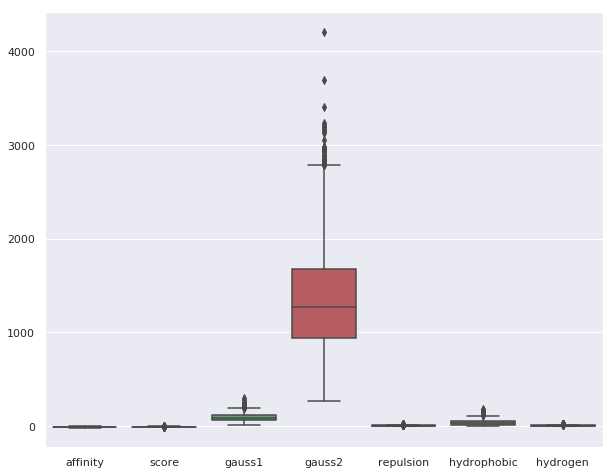

In [3]:
sns.set(rc={'figure.figsize':(10, 8)})
# let's visualize the dataset 
sns.boxplot(data=df)

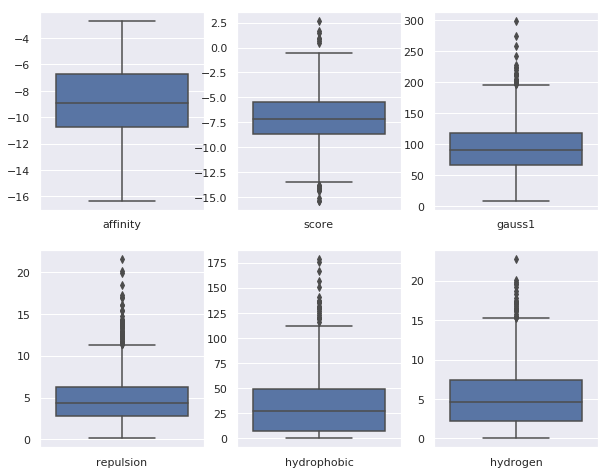

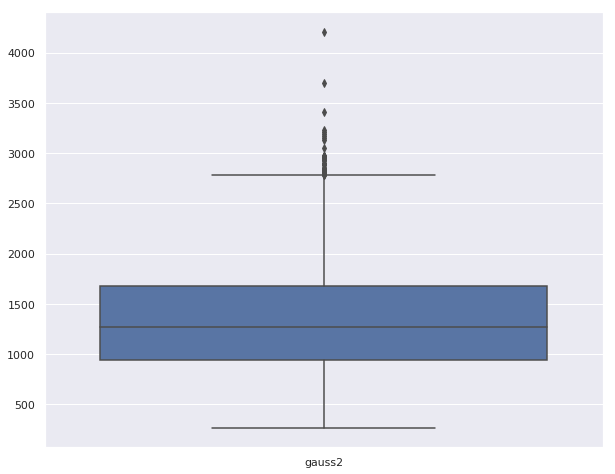

In [4]:
# visualizing the data separately
f , ax = plt.subplots(2,3)

sns.boxplot(data=pd.DataFrame(df['affinity']) , ax=ax[0,0])
sns.boxplot(data=pd.DataFrame(df['score']) , ax=ax[0,1] )
sns.boxplot(data=pd.DataFrame(df['gauss1']) , ax=ax[0,2])
sns.boxplot(data=pd.DataFrame(df['repulsion']) , ax=ax[1,0])
sns.boxplot(data=pd.DataFrame(df['hydrophobic']) , ax=ax[1,1])
sns.boxplot(data=pd.DataFrame(df['hydrogen']) , ax=ax[1,2])

plt.figure()
sns.boxplot(data=pd.DataFrame(df['gauss2']))

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


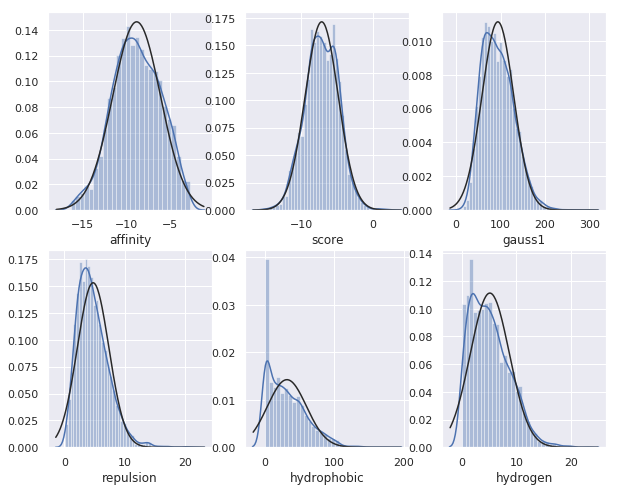

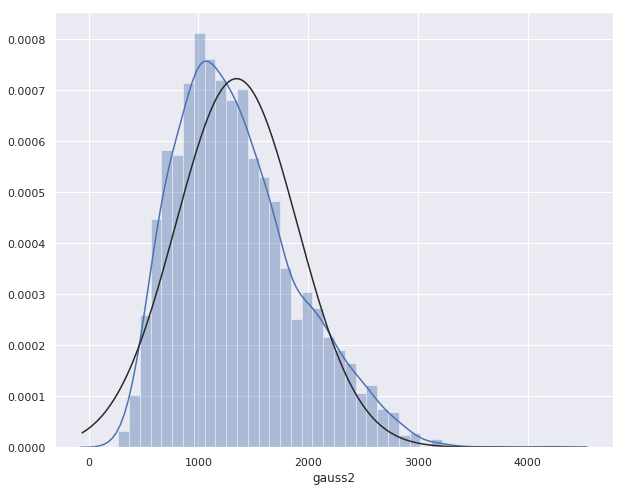

In [5]:
# visualizing the distribution
# visualizing the data separately
f , ax = plt.subplots(2,3)

sns.distplot(df['affinity'] , fit=norm , ax=ax[0,0])
sns.distplot(df['score'] ,fit=norm, ax=ax[0,1] )
sns.distplot(df['gauss1'] ,fit=norm, ax=ax[0,2])
sns.distplot(df['repulsion'],fit=norm , ax=ax[1,0])
sns.distplot(df['hydrophobic'] ,fit=norm, ax=ax[1,1])
sns.distplot(df['hydrogen'] ,fit=norm, ax=ax[1,2])

plt.figure()
sns.distplot(df['gauss2'] , fit=norm)

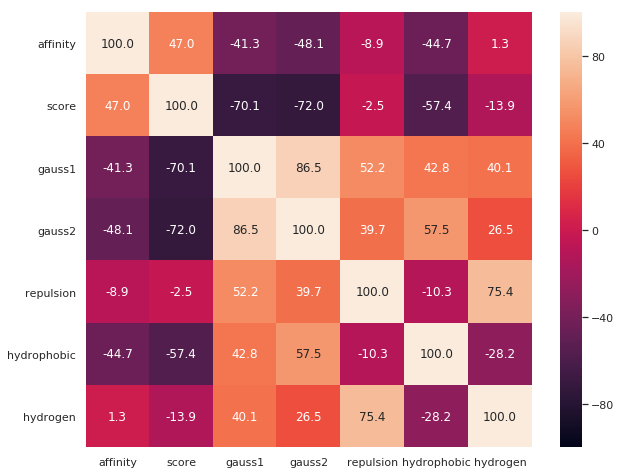

In [6]:
# let's find the correlation
# Calculate correlations
corr = df.corr()*100
 
# Heatmap
sns.heatmap(corr , annot=True , vmin=-100 , vmax=100 , fmt=".1f")

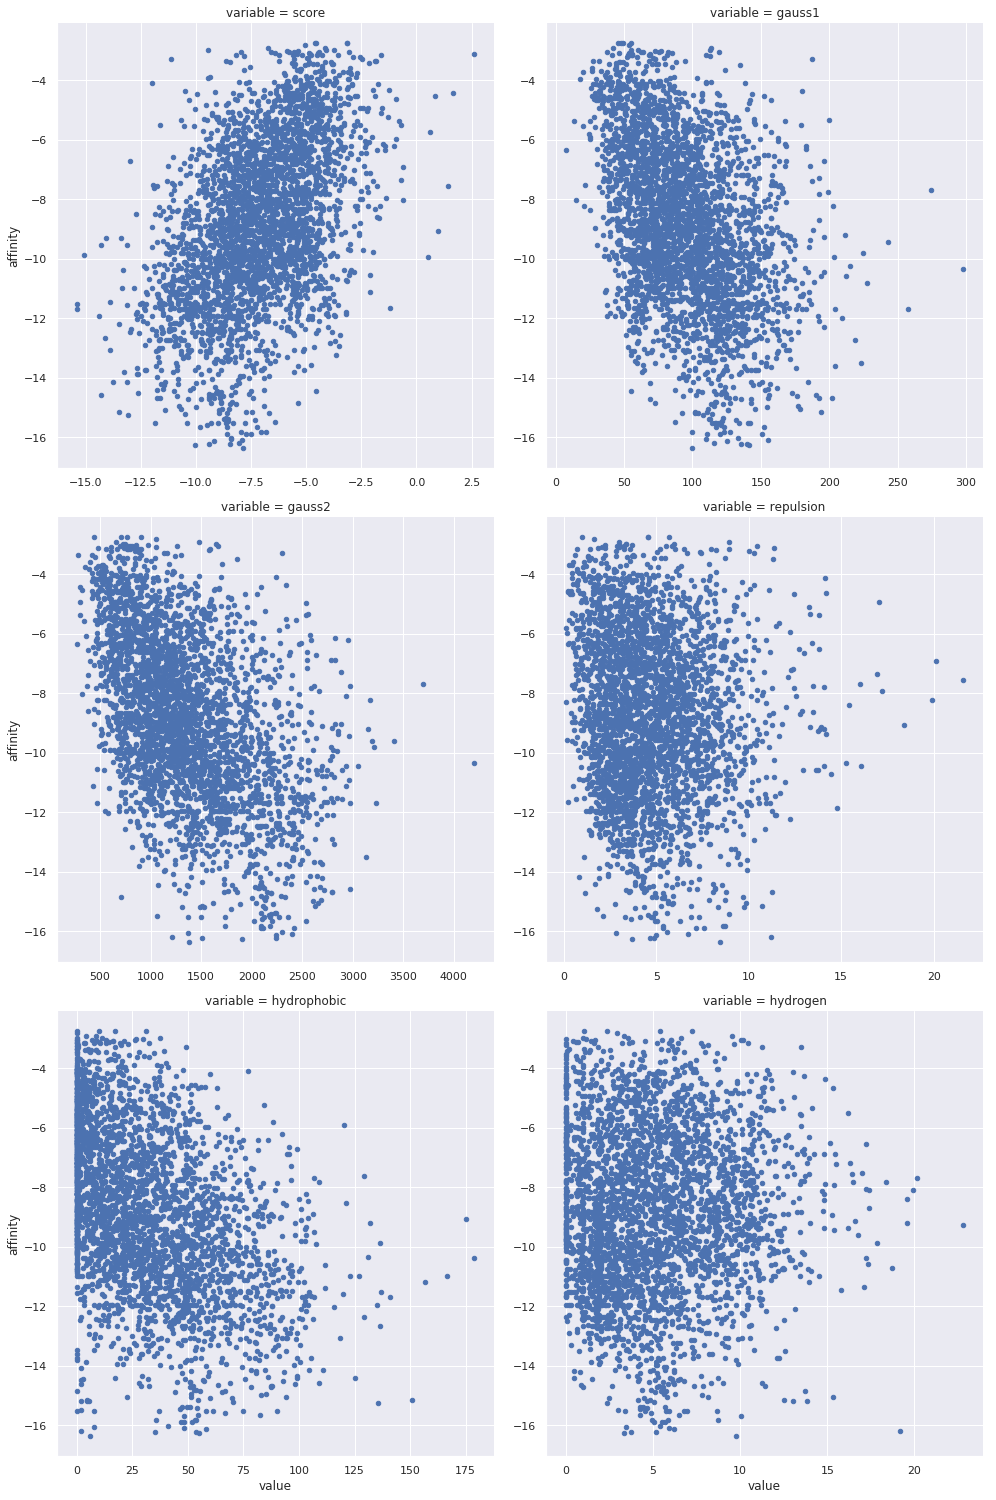

In [7]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts.plot.scatter('time', 'val',ax=ax)


f = pd.melt(df, id_vars=["affinity"], value_vars=df.drop(columns=['affinity']))
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,height=7)
g = g.map(pairplot, "value", "affinity")

In [8]:
X_train,X_test,y_train,y_test \
=  train_test_split(df.drop(columns=['affinity']) , df[['affinity']], test_size=0.25 , random_state=45)

print("Shapes of X_train :" , X_train.shape)
print("Shapes of X_test : " , X_test.shape)
print("Shapes of y_train : " , y_train.shape)
print("Shapes of y_test : " , y_test.shape)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

Shapes of X_train : (2436, 6)
Shapes of X_test :  (812, 6)
Shapes of y_train :  (2436, 1)
Shapes of y_test :  (812, 1)


,score,gauss1,gauss2,repulsion,hydrophobic,hydrogen
2993,-10.98906,128.16097,1700.66854,2.89594,57.83752,0.00000
2956,-3.45061,51.37803,748.94908,2.71088,31.45779,1.80470
1502,-9.93943,166.76526,2465.11831,11.97766,126.81968,14.52559
2709,-5.78814,63.32828,989.01199,3.14033,2.74874,4.82652
2995,-9.05921,145.27893,1554.10560,7.24917,26.73239,9.41558


,score,gauss1,gauss2,repulsion,hydrophobic,hydrogen
2818,-6.09291,47.78243,761.89997,1.26441,74.01939,0.00000
2649,-5.52568,65.21847,602.28056,4.75535,7.00000,8.46580
2695,-2.97958,52.82674,917.04739,6.90250,2.44697,5.31667
1375,-6.66056,120.34128,1840.73653,9.00746,47.99222,3.53062
772,-9.85841,72.40536,1570.44816,1.55809,75.65577,2.21103


,affinity
2993,-9.787438
2956,-12.560317
1502,-10.995425
2709,-6.245840
2995,-5.312396


,affinity
2818,-6.657654
2649,-8.318636
2695,-5.861481
1375,-8.181365
772,-9.334443


In [9]:
# feature preprocessing the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

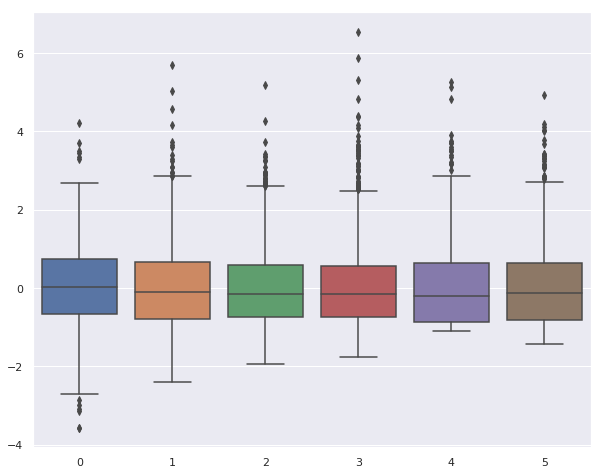

In [10]:
# let's plot the box plot of the standardized data
sns.boxplot(data=X_train_scaled)

In [11]:
reg = linear_model.Lasso(alpha=0.0001 , max_iter=1000000)
reg.fit(X_train_scaled , y_train)
y_test_predict = reg.predict(X_test_scaled)
reg.coef_

array([ 0.87971483,  0.12168216, -0.47294593, -0.58165991, -0.39488419,
        0.58237172])

In [12]:
mean_squared_error(y_test , y_test_predict)

4.998565140686213